In [1]:
import os
import warnings

In [2]:
dataset = "presidential.csv"

# currnet file directory
wd = os.getcwd()

# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [3]:
import numpy as np 
import pandas as pd 

import os
# file list in current folder
print(os.listdir("./"))

['.ipynb_checkpoints', 'airlines.csv', 'dataI.R', 'flights.csv', 'm_04.ipynb', 'm_04_data.R', 'presidential.csv', 'Teams.csv']


In [4]:
# Pandas Data Structure - DataFrame
# The dataframe is a two-dimensional data structure. It contains columns.
df = pd.read_csv(dataset)
type(df)

pandas.core.frame.DataFrame

In [5]:
# It is important to check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
name     11 non-null object
start    11 non-null object
end      11 non-null object
party    11 non-null object
dtypes: object(4)
memory usage: 480.0+ bytes


In [6]:
df.shape

(11, 4)

In [7]:
df.columns

Index(['name', 'start', 'end', 'party'], dtype='object')

In [8]:
df.describe()

name       start         end       party
count     11          11          11          11
unique    10          11          11           2
top     Bush  2001-01-20  2001-01-20  Republican
freq       2           1           1           6

In [9]:
df.head()

name       start         end       party
0  Eisenhower  1953-01-20  1961-01-20  Republican
1     Kennedy  1961-01-20  1963-11-22  Democratic
2     Johnson  1963-11-22  1969-01-20  Democratic
3       Nixon  1969-01-20  1974-08-09  Republican
4        Ford  1974-08-09  1977-01-20  Republican

In [10]:
# df.iloc[[n],[n]]
# This code brings the data in the N row and N column in the DataFrame.
df.iloc[[0],[3]]

party
0  Republican

In [11]:
# df.loc[n:n]
# This code allows us to fetch the data in the range we specify.
df.loc[5:7]

name       start         end       party
5  Carter  1977-01-20  1981-01-20  Democratic
6  Reagan  1981-01-20  1989-01-20  Republican
7    Bush  1989-01-20  1993-01-20  Republican

In [12]:
# like select in R & SQL
df[["name", "party"]]

name       party
0   Eisenhower  Republican
1      Kennedy  Democratic
2      Johnson  Democratic
3        Nixon  Republican
4         Ford  Republican
5       Carter  Democratic
6       Reagan  Republican
7         Bush  Republican
8      Clinton  Democratic
9         Bush  Republican
10       Obama  Democratic

In [13]:
df[df["party"] == "Republican"]

# OR

filters = df["party"] == "Republican"
df[filters]

name       start         end       party
0  Eisenhower  1953-01-20  1961-01-20  Republican
3       Nixon  1969-01-20  1974-08-09  Republican
4        Ford  1974-08-09  1977-01-20  Republican
6      Reagan  1981-01-20  1989-01-20  Republican
7        Bush  1989-01-20  1993-01-20  Republican
9        Bush  2001-01-20  2009-01-20  Republican

In [14]:
# Because the column ["start"] is "String" data type.

# NO
# df[(df["start"] > 1973) & (df["party"] == "Democratic")]

# YES
df[(df["start"] > "1973") & (df["party"] == "Democratic")]

name       start         end       party
5    Carter  1977-01-20  1981-01-20  Democratic
8   Clinton  1993-01-20  2001-01-20  Democratic
10    Obama  2009-01-20  2017-01-20  Democratic

In [17]:
# if data type is String, there are several ways to control data
# Ex. upper, lower, split, replace, (con)cat ...

df["start"].str.split("-", expand=True, n=1) # n is limit the number of splits

0      1
0   1953  01-20
1   1961  01-20
2   1963  11-22
3   1969  01-20
4   1974  08-09
5   1977  01-20
6   1981  01-20
7   1989  01-20
8   1993  01-20
9   2001  01-20
10  2009  01-20

In [18]:
# isin & isnull is also good method to use.
df[df["party"].isin(["Democratic"])].head()

name       start         end       party
1   Kennedy  1961-01-20  1963-11-22  Democratic
2   Johnson  1963-11-22  1969-01-20  Democratic
5    Carter  1977-01-20  1981-01-20  Democratic
8   Clinton  1993-01-20  2001-01-20  Democratic
10    Obama  2009-01-20  2017-01-20  Democratic

In [17]:
# mutate() in R -> Defining New Column
# And to calculate the interval of date
# We should change the data type string to datetime64
df["start"] = pd.to_datetime(df["start"])
df["end"] = pd.to_datetime(df["end"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
name     11 non-null object
start    11 non-null datetime64[ns]
end      11 non-null datetime64[ns]
party    11 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 432.0+ bytes


In [18]:
# to control date very well, we can figure out how to control data type "datetime64"
df["length"] = (df["end"]-df["start"]).astype('timedelta64[Y]')
df

name      start        end       party  length
0   Eisenhower 1953-01-20 1961-01-20  Republican     8.0
1      Kennedy 1961-01-20 1963-11-22  Democratic     2.0
2      Johnson 1963-11-22 1969-01-20  Democratic     5.0
3        Nixon 1969-01-20 1974-08-09  Republican     5.0
4         Ford 1974-08-09 1977-01-20  Republican     2.0
5       Carter 1977-01-20 1981-01-20  Democratic     4.0
6       Reagan 1981-01-20 1989-01-20  Republican     8.0
7         Bush 1989-01-20 1993-01-20  Republican     4.0
8      Clinton 1993-01-20 2001-01-20  Democratic     8.0
9         Bush 2001-01-20 2009-01-20  Republican     8.0
10       Obama 2009-01-20 2017-01-20  Democratic     8.0

In [19]:
# some function just return changed DataFrame.
# So, we need to put the changed DataFrame into previous one
df['elected'] = df['start'].map(lambda x: x.year) + 1

In [20]:
df

name      start        end       party  length  elected
0   Eisenhower 1953-01-20 1961-01-20  Republican     8.0     1954
1      Kennedy 1961-01-20 1963-11-22  Democratic     2.0     1962
2      Johnson 1963-11-22 1969-01-20  Democratic     5.0     1964
3        Nixon 1969-01-20 1974-08-09  Republican     5.0     1970
4         Ford 1974-08-09 1977-01-20  Republican     2.0     1975
5       Carter 1977-01-20 1981-01-20  Democratic     4.0     1978
6       Reagan 1981-01-20 1989-01-20  Republican     8.0     1982
7         Bush 1989-01-20 1993-01-20  Republican     4.0     1990
8      Clinton 1993-01-20 2001-01-20  Democratic     8.0     1994
9         Bush 2001-01-20 2009-01-20  Republican     8.0     2002
10       Obama 2009-01-20 2017-01-20  Democratic     8.0     2010

In [21]:
df.loc[(df["elected"] == 1962) | (df["elected"] == 1973), "elected"] = 'NA' 

In [22]:
df

name      start        end       party  length elected
0   Eisenhower 1953-01-20 1961-01-20  Republican     8.0    1954
1      Kennedy 1961-01-20 1963-11-22  Democratic     2.0      NA
2      Johnson 1963-11-22 1969-01-20  Democratic     5.0    1964
3        Nixon 1969-01-20 1974-08-09  Republican     5.0    1970
4         Ford 1974-08-09 1977-01-20  Republican     2.0    1975
5       Carter 1977-01-20 1981-01-20  Democratic     4.0    1978
6       Reagan 1981-01-20 1989-01-20  Republican     8.0    1982
7         Bush 1989-01-20 1993-01-20  Republican     4.0    1990
8      Clinton 1993-01-20 2001-01-20  Democratic     8.0    1994
9         Bush 2001-01-20 2009-01-20  Republican     8.0    2002
10       Obama 2009-01-20 2017-01-20  Democratic     8.0    2010

In [23]:
df = df.rename(columns= {'length' : 'term_length'})

In [24]:
df

name      start        end       party  term_length elected
0   Eisenhower 1953-01-20 1961-01-20  Republican          8.0    1954
1      Kennedy 1961-01-20 1963-11-22  Democratic          2.0      NA
2      Johnson 1963-11-22 1969-01-20  Democratic          5.0    1964
3        Nixon 1969-01-20 1974-08-09  Republican          5.0    1970
4         Ford 1974-08-09 1977-01-20  Republican          2.0    1975
5       Carter 1977-01-20 1981-01-20  Democratic          4.0    1978
6       Reagan 1981-01-20 1989-01-20  Republican          8.0    1982
7         Bush 1989-01-20 1993-01-20  Republican          4.0    1990
8      Clinton 1993-01-20 2001-01-20  Democratic          8.0    1994
9         Bush 2001-01-20 2009-01-20  Republican          8.0    2002
10       Obama 2009-01-20 2017-01-20  Democratic          8.0    2010

In [25]:
df.sort_values('term_length', ascending=False)

name      start        end       party  term_length elected
0   Eisenhower 1953-01-20 1961-01-20  Republican          8.0    1954
6       Reagan 1981-01-20 1989-01-20  Republican          8.0    1982
8      Clinton 1993-01-20 2001-01-20  Democratic          8.0    1994
9         Bush 2001-01-20 2009-01-20  Republican          8.0    2002
10       Obama 2009-01-20 2017-01-20  Democratic          8.0    2010
2      Johnson 1963-11-22 1969-01-20  Democratic          5.0    1964
3        Nixon 1969-01-20 1974-08-09  Republican          5.0    1970
5       Carter 1977-01-20 1981-01-20  Democratic          4.0    1978
7         Bush 1989-01-20 1993-01-20  Republican          4.0    1990
1      Kennedy 1961-01-20 1963-11-22  Democratic          2.0      NA
4         Ford 1974-08-09 1977-01-20  Republican          2.0    1975

In [26]:
df

name      start        end       party  term_length elected
0   Eisenhower 1953-01-20 1961-01-20  Republican          8.0    1954
1      Kennedy 1961-01-20 1963-11-22  Democratic          2.0      NA
2      Johnson 1963-11-22 1969-01-20  Democratic          5.0    1964
3        Nixon 1969-01-20 1974-08-09  Republican          5.0    1970
4         Ford 1974-08-09 1977-01-20  Republican          2.0    1975
5       Carter 1977-01-20 1981-01-20  Democratic          4.0    1978
6       Reagan 1981-01-20 1989-01-20  Republican          8.0    1982
7         Bush 1989-01-20 1993-01-20  Republican          4.0    1990
8      Clinton 1993-01-20 2001-01-20  Democratic          8.0    1994
9         Bush 2001-01-20 2009-01-20  Republican          8.0    2002
10       Obama 2009-01-20 2017-01-20  Democratic          8.0    2010

In [27]:
# Define the aggregation calculations
aggregations = {
    "party": { # work on the "party" column
        "N": "count" 
    },
    "start": {     # Now work on the "date" column
        'min_date': "min",
    },
    "end": {
        "max_date": "max" # Find the max, call the result "max_date"
    },
    "term_length": "mean"
}
# Perform groupby aggregation by "month", but only on the rows that are of type "call"
df.groupby('party').agg(aggregations)

C:\Users\ddacc\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


party      start        end term_length
               N   min_date   max_date        mean
party                                             
Democratic     5 1961-01-20 2017-01-20    5.400000
Republican     6 1953-01-20 2009-01-20    5.833333

In [68]:
Teams = pd.read_csv("Teams.csv")

In [ ]:
Teams.head()

In [ ]:
Teams.info()

In [ ]:
mets = Teams[Teams["teamID"] == "NYN"]

In [ ]:
myMets = mets[(mets["yearID"] >= 2004) & (mets["yearID"] <= 2012)]

In [ ]:
myMets = myMets[["yearID", "teamID", "W", "L"]]

In [ ]:
myMets

# other method is just what we learned about

In [ ]:
flights = pd.read_csv("flights.csv")

In [ ]:
flights.info()

In [ ]:
flights.head()

In [ ]:
airlines = pd.read_csv("airlines.csv")

In [ ]:
airlines.head()

In [ ]:
flightJoined = pd.merge(left=flights,right=airlines, left_on="carrier", right_on="carrier")

In [ ]:
flightJoined[["carrier", "name", "flight", "origin", "dest"]]

In [ ]:
flightLeftJoined = pd.merge(left=flights,right=airlines, how='left', left_on="carrier", right_on="carrier")

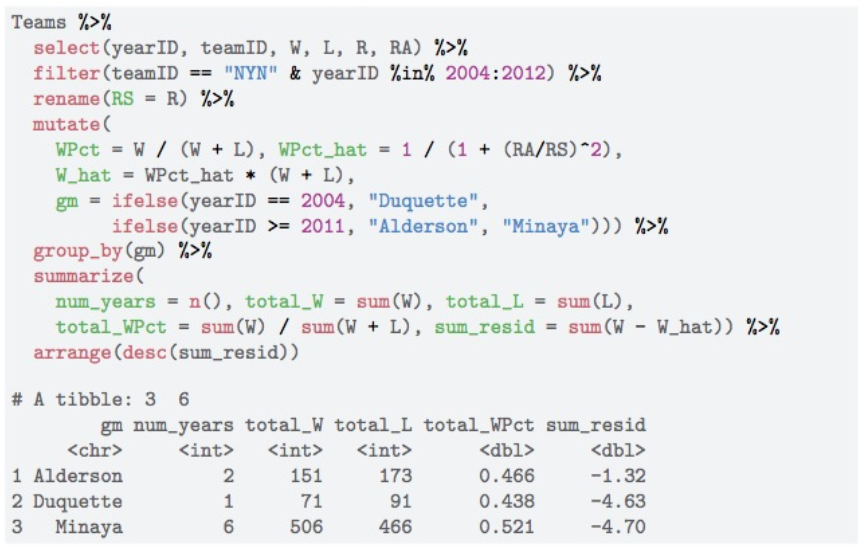

In [69]:
Teams = Teams[["yearID", "teamID", "W", "L", "R", "RA"]]

In [70]:
Teams = Teams[(Teams["teamID"] == "NYN") & (Teams["yearID"] >= 2004) & (Teams["yearID"] <= 2012)]

In [71]:
Teams = Teams.rename(columns= {'R' : 'RS'})

In [72]:
Teams["WPct"] = Teams["W"] / (Teams["W"] + Teams["L"])

In [73]:
Teams["WPct_hat"] = 1 / (1 + (Teams["RA"]/Teams["RS"])*(Teams["RA"]/Teams["RS"]))

In [74]:
Teams["W_hat"] = Teams["WPct_hat"] * (Teams["W"] + Teams["L"])

In [75]:
conditions = [
    (Teams["yearID"] == 2004),
    (Teams["yearID"] >= 2011)]

choices = ["Duquette", "alderson"]

Teams["gm"] = np.select(conditions, choices, default="Minaya")

In [76]:
Teams.head()

yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat        gm
2464    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011  Duquette
2493    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909    Minaya
2523    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997    Minaya
2553    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554    Minaya
2583    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528    Minaya

In [77]:
# Define the aggregation calculations
aggregations = {
    "gm": { # work on the "party" column
        "N": "count" 
    },
    "W": {
        "total_W": "sum"
    },
    "L": {
        "total_L": "sum"
    },
    "WPct": {
        "total_WPct": "sum"
    }
}
# Perform groupby aggregation by "month", but only on the rows that are of type "call"
Teams = Teams.groupby("gm").agg(aggregations)